In [39]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from proj1_helpers import *
from implementations import * 
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [18]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)

In [17]:
y_explore, tX_explore, ids_explore = load_csv_data(DATA_TRAIN_PATH,sub_sample = True)

## Data Exploration

In [7]:
num_samples = len(y)
num_features0 = tX.shape[1]

print("Number of samples in train data set: {}".format(num_samples))
print("Initial number of features in train data set : {}".format(num_features0))

Number of samples in train data set: 250000
Initial number of features in train data set : 30


In [8]:
print("Number of Nan values in train data set : {}".format(np.argwhere(np.isnan(tX)).shape[0]))
print("Number of Nan values in train data set : {}".format(np.count_nonzero(np.where(tX == np.nan, 1,0))))

Number of Nan values in train data set : 0
Number of Nan values in train data set : 0


In [9]:
tX.dtype

dtype('float64')

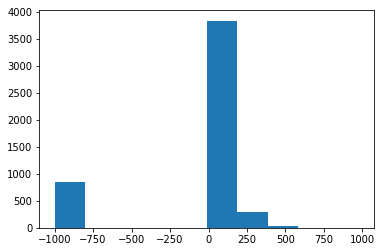

In [10]:
# Exploration of distributions
plt.hist(tX_explore[:,0])
plt.show()

## Feature Engineering

### *Dealing with undefined values* ###

In [29]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets

ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y = split_subsets(tX, y)

print(ss0_tX.shape)
print(ss1_tX.shape)
print(ss2_tX.shape)
print(ss3_tX.shape)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
(99913, 19)
(77544, 22)
(50379, 29)
(22164, 29)


In [33]:
print("Number of remaining undefined values in subset 0 : {}".format(np.count_nonzero(ss0_tX == -999.0)))
undefined_indices = np.argwhere(ss0_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))


print("Number of remaining undefined values in subset 1 : {}".format(np.count_nonzero(ss1_tX == -999.0)))
undefined_indices = np.argwhere(ss1_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 2 : {}".format(np.count_nonzero(ss2_tX == -999.0)))
undefined_indices = np.argwhere(ss2_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 3 : {}".format(np.count_nonzero(ss3_tX == -999.0)))
undefined_indices = np.argwhere(ss3_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

Number of remaining undefined values in subset 0 : 26123
19
Feature repartition of these values : [[    0]
 [26123]]
Number of remaining undefined values in subset 1 : 7562
Feature repartition of these values : [[   0]
 [7562]]
Number of remaining undefined values in subset 2 : 2952
Feature repartition of these values : [[   0]
 [2952]]
Number of remaining undefined values in subset 3 : 1477
Feature repartition of these values : [[   0]
 [1477]]


Thus all remaining undefined values belong to the first feature **DER_mass_MMC**.

Dealing with outliers (j'arrive pas à le mettre en titre noir :( )

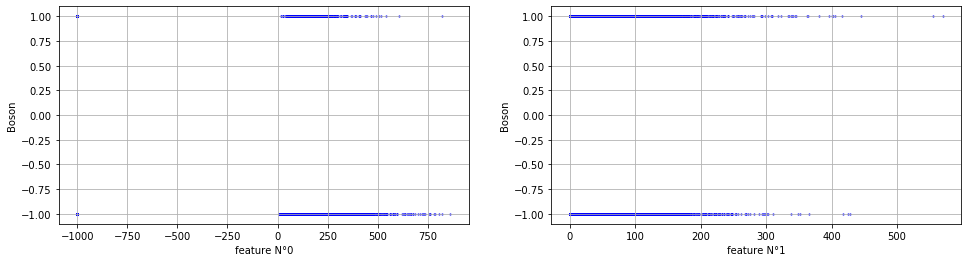

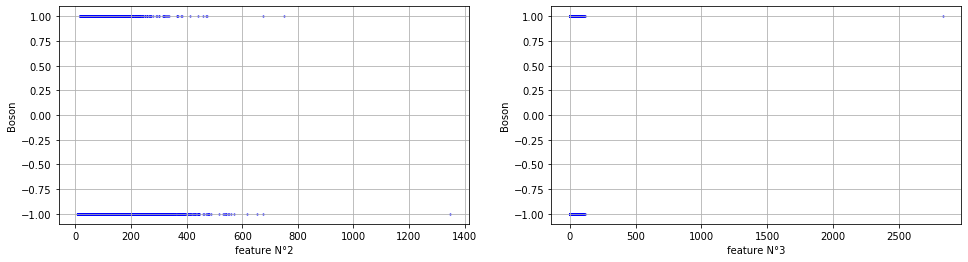

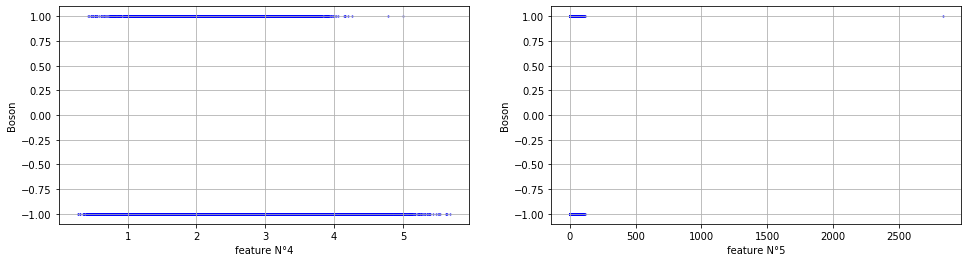

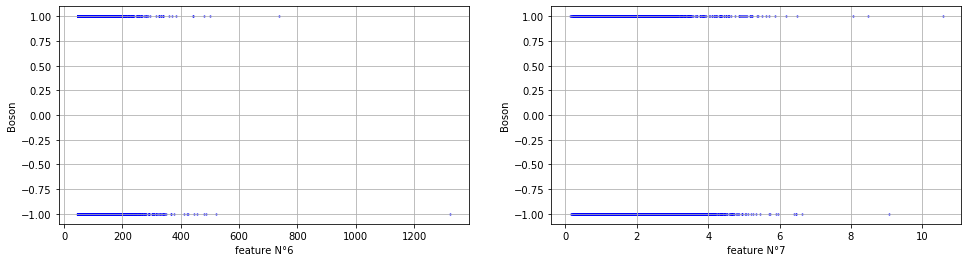

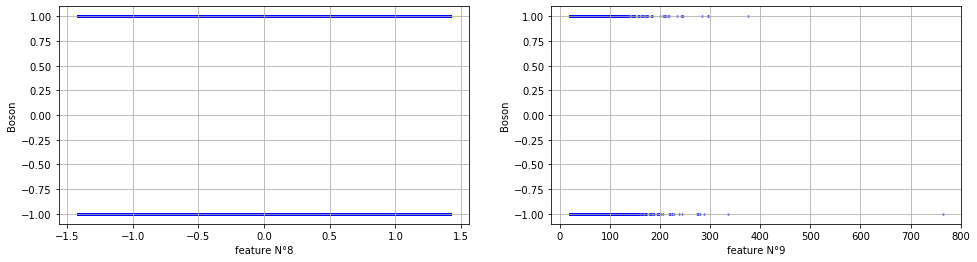

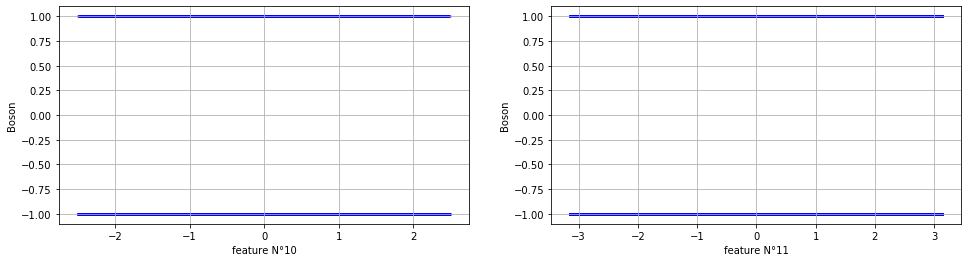

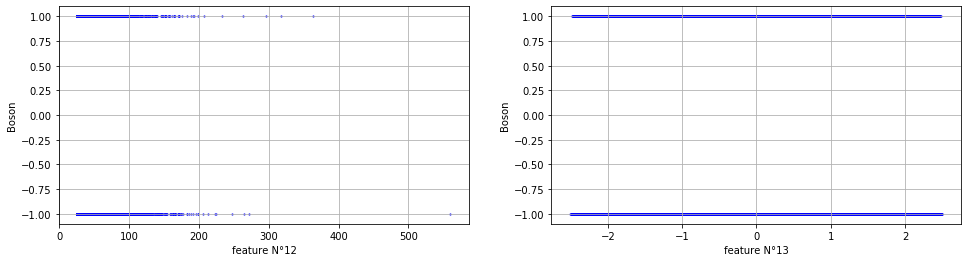

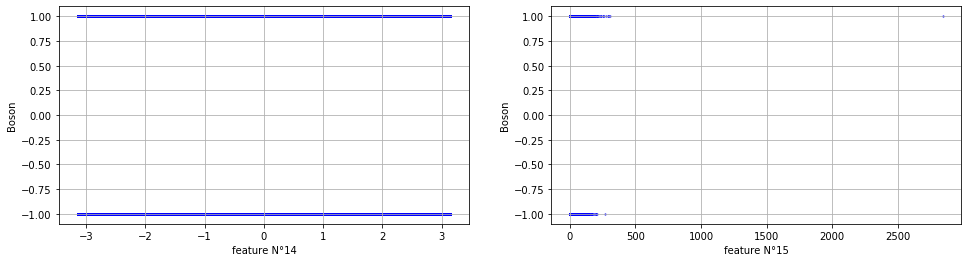

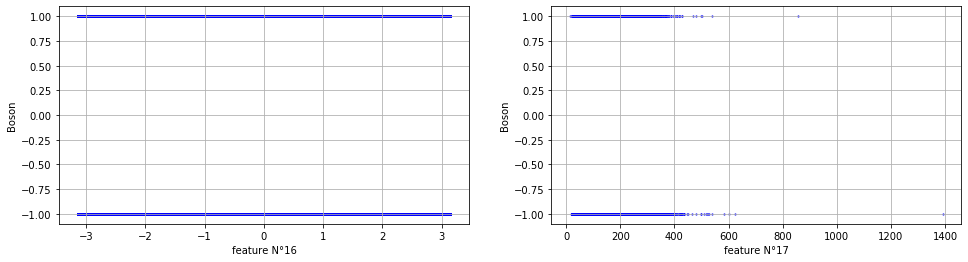

In [35]:
#Plotting sccatter of the features

for i in range(0,np.size(ss0_tX,1)-1,2):
    fig = scatter_visualization(ss0_y, ss0_tX[:,i], ss0_tX[:,i+1],i)
    fig.set_size_inches(25.0,4.0)

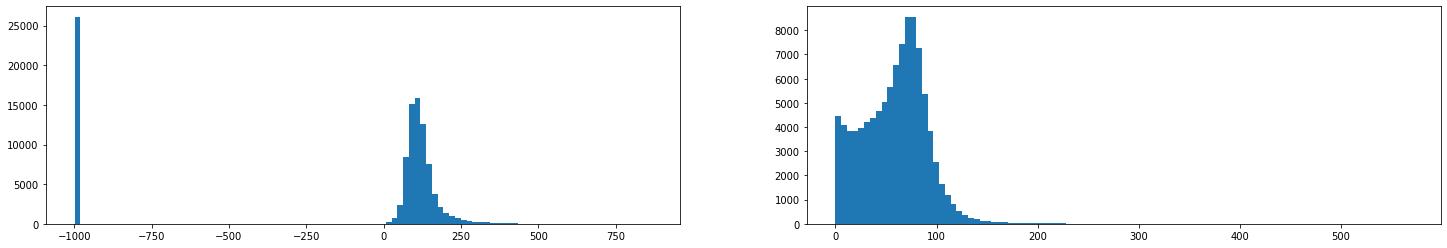

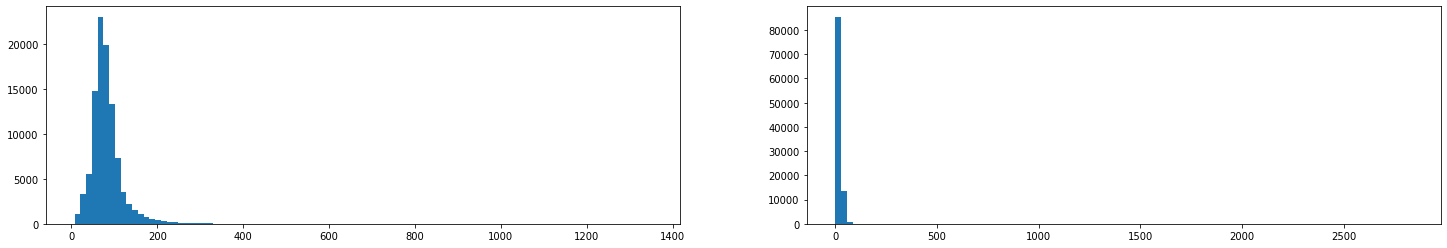

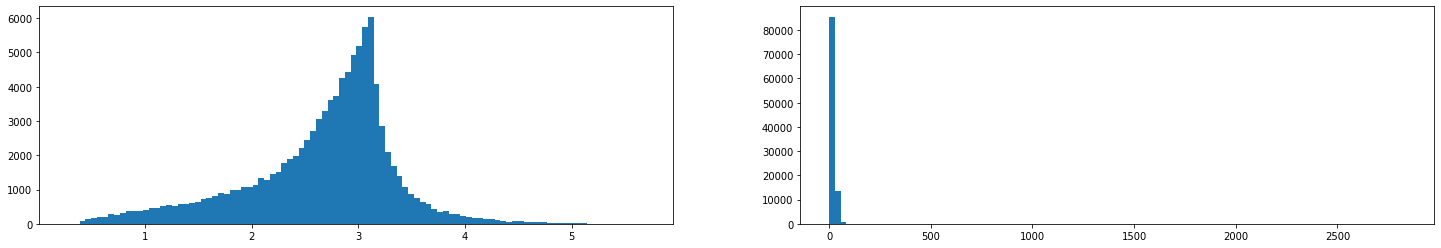

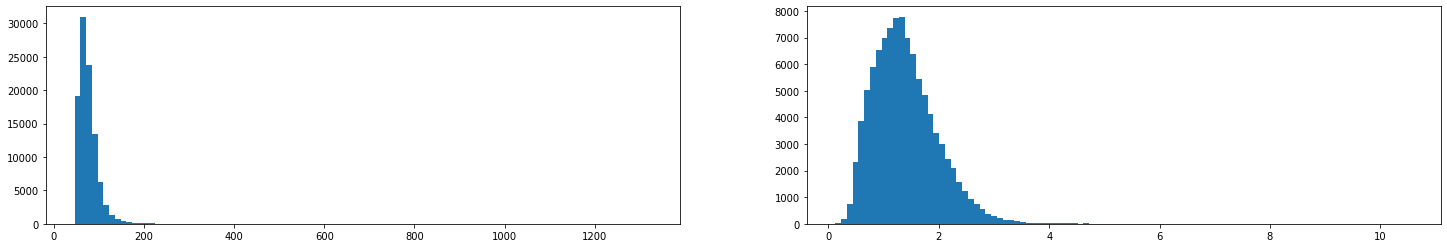

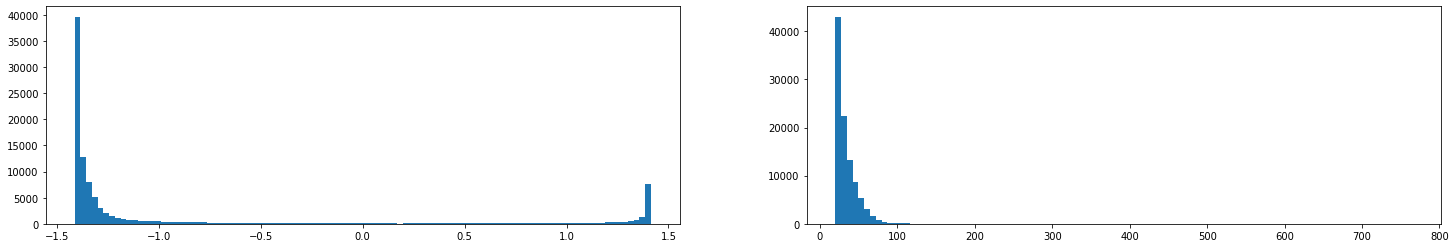

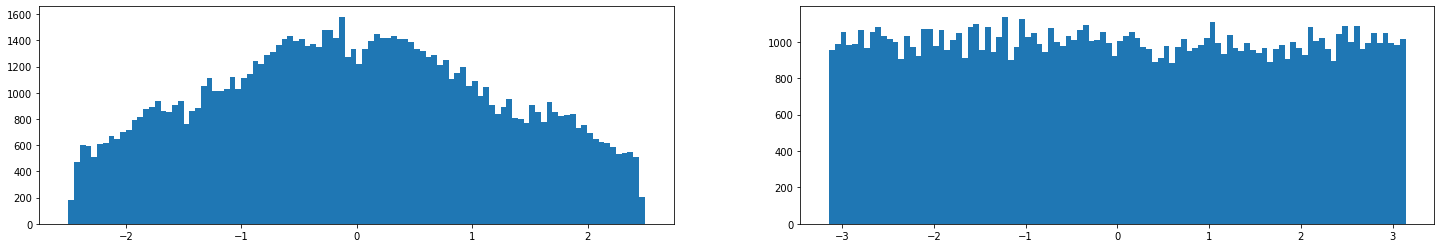

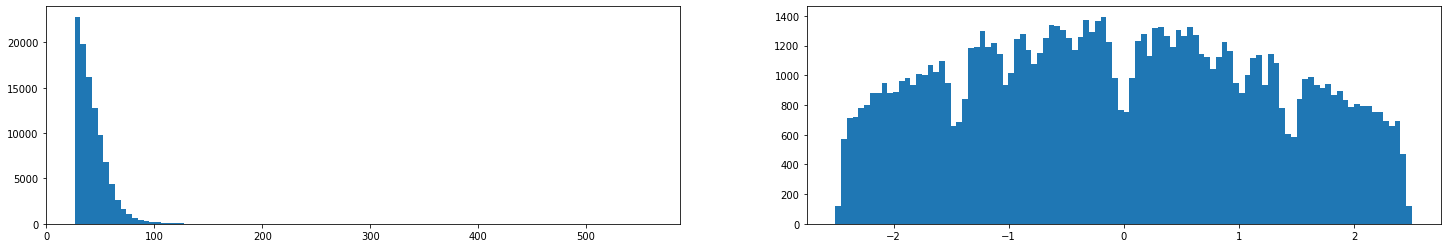

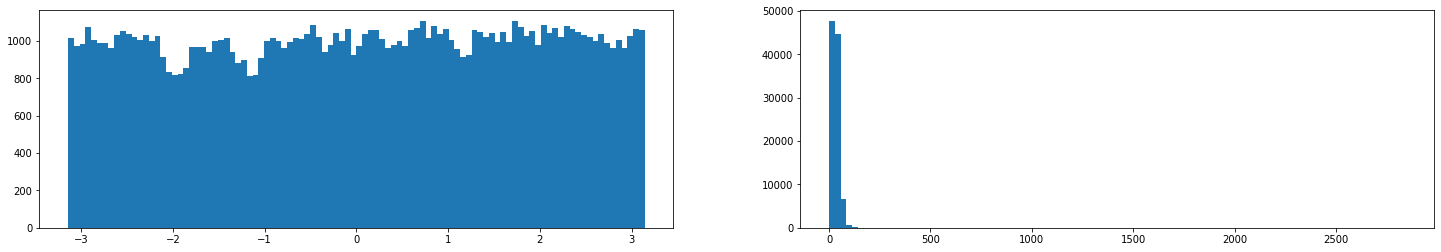

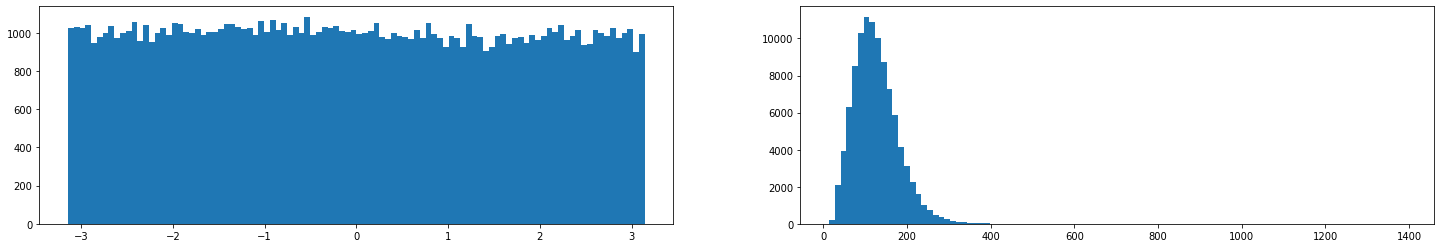

In [40]:
#Plotting histograms of the features

for i in range(0,np.size(ss0_tX,1)-1,2):
    fig = histo_visualization(ss0_tX[:,i], ss0_tX[:,i+1])
    fig.set_size_inches(25.0,4.0)

### *Feature augmentation* ###

In [16]:
# Chose the degree of features 
degree = 1 
tX_poly = build_poly(tX_explore,degree)

In [17]:
# Standardize data
tX_sd = standardize(tX_poly)

## Model selection and Optimisation

In [18]:
#

### Least Square

In [20]:
w_ls, loss_ls = least_squares(y_explore, tX_sd)

Least squares: loss=2.0
Least squares: w=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [14]:
print('Percentage of correct classification on train set : {}'.format(loss_ls))

NameError: name 'loss_ls' is not defined

### Least Square Gradient Descent

In [ ]:
initial_w = np.zeros(10)
max_iters = 500
gamma = 0.1

In [ ]:
w_ls_GD, loss_ls_GD = least_squares_GD(y, tX_sd[:,:10], initial_w, max_iters, gamma)

In [ ]:
print('Final class error on train data : {}'.format(loss_ls_GD))

### Least Square Stochastic Gradient Descent

In [ ]:
initial_w = np.zeros(3)
max_iters = 500
gamma = 0.1

In [ ]:
w_ls_SGD, loss_ls_SGC = least_squares_SGD(y, tX[:,:3], initial_w, max_iters, gamma)

### Ridge Regression

In [ ]:
lambda_ = 0.1

In [ ]:
w_rr, loss_rr = ridge_regression(y, tX, lambda_)

### Logistic Regression

In [ ]:
initial_w = np.zeros(3)
max_iters = 500
gamma = 0.1

In [ ]:
logistic_regression(y, tX[:,:3], initial_w, max_iters, gamma)

### Regularized Logistic Regression

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = os.path.dirname(os.getcwd()) + '/data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
weights = w_ls
tX_test = tX_test

In [ ]:
OUTPUT_PATH = os.path.dirname(os.getcwd()) + '/data/' + str(datetime.now())# TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)